1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

Number of global minima: 6
Global minimum 1 at point [ 0.08984199 -0.71265634] has function value: -1.0316284534898486
Global minimum 2 at point [-0.0898425   0.71265658] has function value: -1.031628453488783
Global minimum 3 at point [-1.70360671  0.79608356] has function value: -0.21546382438371692
Global minimum 4 at point [-1.60710489 -0.56865157] has function value: 2.104250310311412
Global minimum 5 at point [ 1.70360686 -0.79608341] has function value: -0.21546382438318956
Global minimum 6 at point [1.60710477 0.56865145] has function value: 2.104250310311259


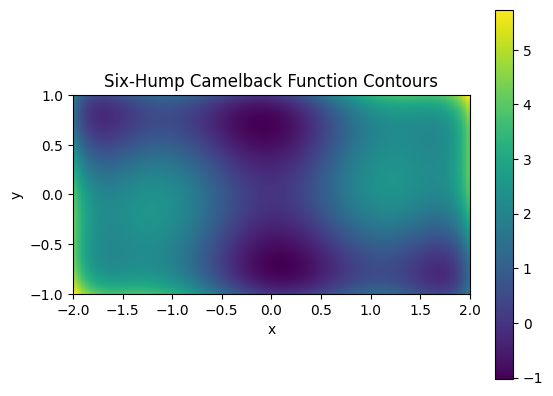

In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fftpack import fft, fftfreq, fft2, fftshift
from matplotlib.colors import LogNorm

def six_hump_camelback(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4) / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

bounds = [(-2, 2), (-1, 1)]
global_minima = []

for x in np.linspace(-2, 2, 10):
    for y in np.linspace(-1, 1, 10):
        result = minimize(six_hump_camelback, [x, y], bounds=bounds)
        is_new_minimum = True
        for point, value in global_minima:
            if np.allclose(result.x, point, atol=1e-3):
                is_new_minimum = False
                break
        if is_new_minimum:
            global_minima.append((result.x, result.fun))

print("Number of global minima:", len(global_minima))
for i, (point, value) in enumerate(global_minima):
    print(f"Global minimum {i+1} at point {point} has function value: {value}")

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = six_hump_camelback([X, Y])

plt.figure()
plt.imshow(Z, extent=[-2, 2, -1, 1], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Six-Hump Camelback Function Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

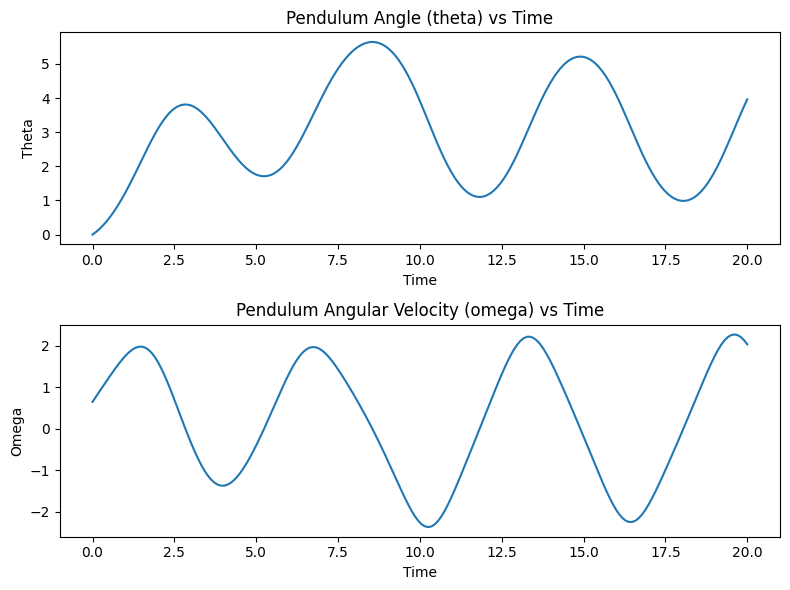

In [6]:
def pendulum_equations(y, t, Q, g, l, d, Omega):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -1 / Q * omega + (g / l) * np.sin(theta) + d * np.cos(Omega * t)
    return [dtheta_dt, domega_dt]

l = 10.0
Q = 2.0
d = 1.5
Omega = 1.0
g = 9.81
theta_0 = 0.0
omega_0 = 0.65

initial_conditions = [theta_0, omega_0]
time = np.linspace(0, 20, 200)
solution = odeint(pendulum_equations, initial_conditions, time, args=(Q, g, l, d, Omega))

plt.figure(figsize=(8, 6))

#theta x time
plt.subplot(2, 1, 1)
plt.plot(time, solution[:, 0])
plt.title('Pendulum Angle (theta) vs Time')
plt.xlabel('Time')
plt.ylabel('Theta')

#omega x time
plt.subplot(2, 1, 2)
plt.plot(time, solution[:, 1])
plt.title('Pendulum Angular Velocity (omega) vs Time')
plt.xlabel('Time')
plt.ylabel('Omega')

plt.tight_layout()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

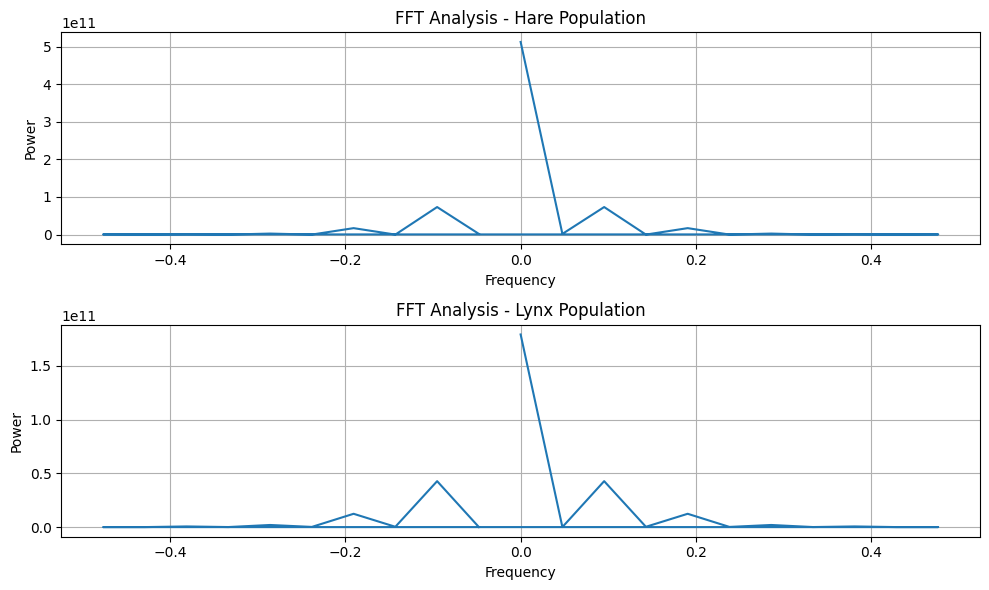

Period of hare population: 10.5 years
Period of lynx population: 10.5 years


In [7]:
data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0]
hare_population = data[:, 1]
lynx_population = data[:, 2]

hare_fft = fft(hare_population)
power_hare = np.abs(hare_fft)**2
freqs_hare = fftfreq(len(hare_population))

lynx_fft = fft(lynx_population)
power_lynx = np.abs(lynx_fft)**2
freqs_lynx = fftfreq(len(lynx_population))

#ignore zero-frequency component
nonzero_freqs_hare = freqs_hare[1:]
nonzero_power_hare = power_hare[1:]

nonzero_freqs_lynx = freqs_lynx[1:]
nonzero_power_lynx = power_lynx[1:]

#convert dominant frequencies to periods
period_hare = 1 / nonzero_freqs_hare[np.argmax(nonzero_power_hare)]
period_lynx = 1 / nonzero_freqs_lynx[np.argmax(nonzero_power_lynx)]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.title('FFT Analysis - Hare Population')
plt.plot(freqs_hare, power_hare)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()

plt.subplot(2, 1, 2)
plt.title('FFT Analysis - Lynx Population')
plt.plot(freqs_lynx, power_lynx)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid()

plt.tight_layout()
plt.show()

print(f"Period of hare population: {period_hare} years")
print(f"Period of lynx population: {period_lynx} years")

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

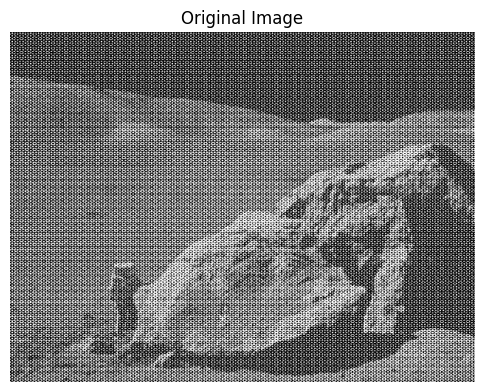

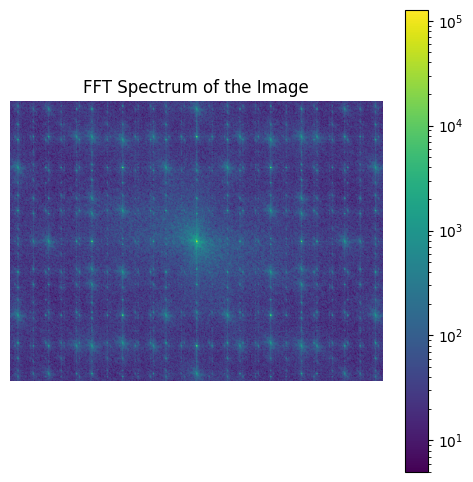

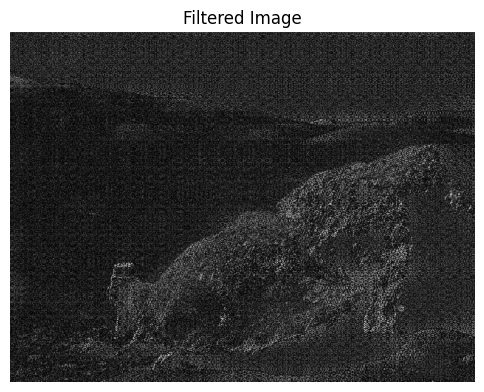

In [8]:
image = plt.imread("images/moonlanding.png")

plt.figure(figsize=(6, 6))
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)

plt.figure(figsize=(6, 6))
plt.title('FFT Spectrum of the Image')
plt.imshow(np.abs(image_fft_shifted), norm=LogNorm(vmin=5))
plt.colorbar()
plt.axis('off')
plt.show()

noise_threshold = 1500
filtered_fft_shifted = image_fft_shifted.copy()
filtered_fft_shifted[np.abs(filtered_fft_shifted) > noise_threshold] = 0

filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fft_shifted)))

plt.figure(figsize=(6, 6))
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.show()